# Intorduction to neural network classification with Tensorflow

---
 In this notebook we are going to write neural networks for classification problems
There are a few types of classification such as:
* Binary classification
* Multiclass classification
* Multilabel classification


## Imports


In [155]:
# Ploting
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
# Sk learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [156]:
# Make by default all fig sized 10 ,6
plt.rcParams["figure.figsize"] = (10,6)

## Create some data view it and fit it

In [157]:
from sklearn.datasets import make_circles


# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [158]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [159]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Lets visualize our data

In [160]:
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                       "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


 Now lets visualzie with plots

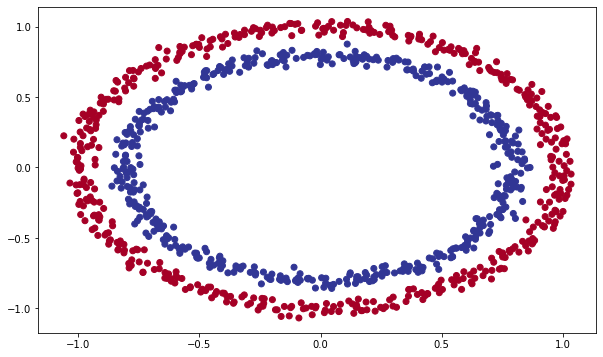

In [161]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0],X[:, 1],c=y,cmap=plt.cm.RdYlBu);

In [162]:
# Check the shape of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [163]:
# How many samples are we working
len(X),len(y)

(1000, 1000)

In [164]:
# View the first feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling a classfication problem

---

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model



In [165]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [166]:
# Now lets try to imporve our model by fitting it again but for more epochs

model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

The model practicaly just guesses the output.
So lets try to make a bette model by adding more hidden layers

In [167]:
# Build another model with more hidden layers

# Set up random seed
tf.random.set_seed(42)


# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5130


[0.6948798894882202, 0.5130000114440918]

### Further improving our model

by changing:
* Activation on hidden layers


In [168]:
# Build model 3

# Set up random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(10,activation="softmax"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Early callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)


# 3. Fit the model
model_3.fit(X,
            y,
            epochs=1000,
            callbacks = [callback],
            verbose = 0)

# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000


[0.6953315138816833, 0.5]

## Lets try to visualize our models predictions

In [169]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [170]:
def plot_history(history):
  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")

doing multiclass classification...


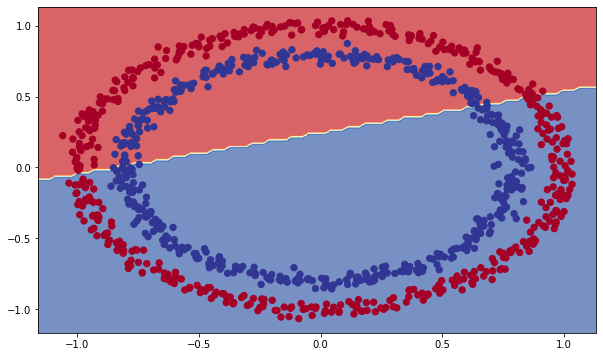

In [171]:
plot_decision_boundary(model_2,X,y)

We can notice that the model tries to find a straight line(regression) while we are actually working with a binary classification

### Non-Linearity

In [172]:
# Set up the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="linear")                 
])

# 2. Compile our model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X,y,epochs=100,verbose=0)

In [173]:
# 4. Evaluate the model
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7853 - accuracy: 0.4770


[0.7852917909622192, 0.47699999809265137]

doing binary classifcation...


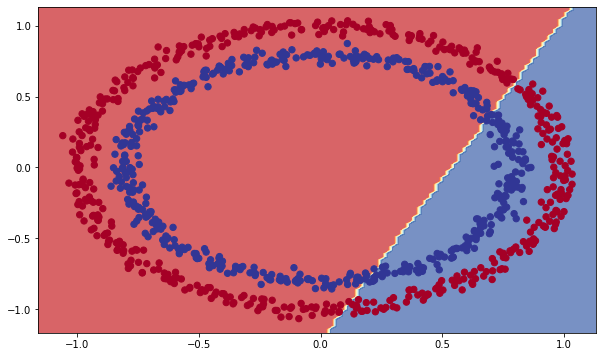

In [174]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_4,X,y)

Lets try some non-linear activations

In [175]:
# Set random seed
tf.random.set_seed(42)

# 1. Build model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X,y,epochs=100,verbose=0)


# 4. Evaluate the model
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5390


[0.6931530833244324, 0.5389999747276306]

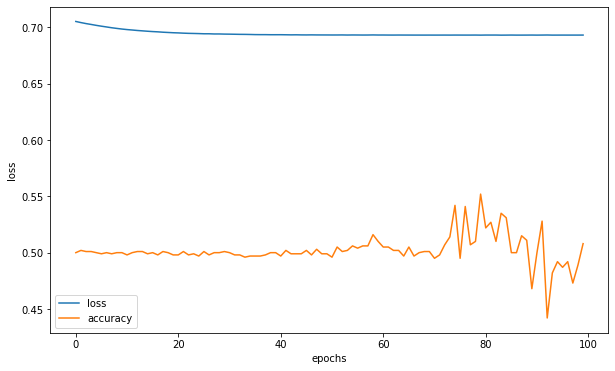

In [176]:
plot_history(history_5)

doing binary classifcation...


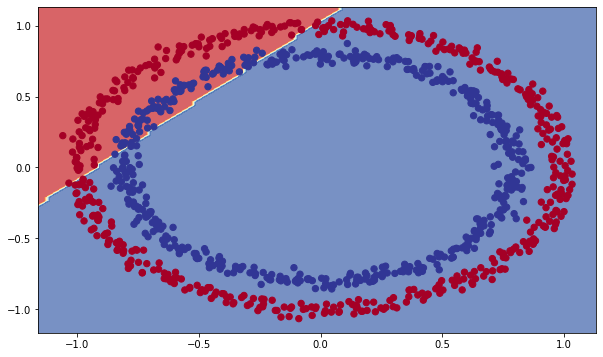

In [177]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_5,X,y)

In [178]:
# Time to make a multi layer neural network

# Set up random seed
tf.random.set_seed(42)

# 1. Build the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
history_6 = model_6.fit(X,y,epochs=100,verbose=0)

# 4.Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

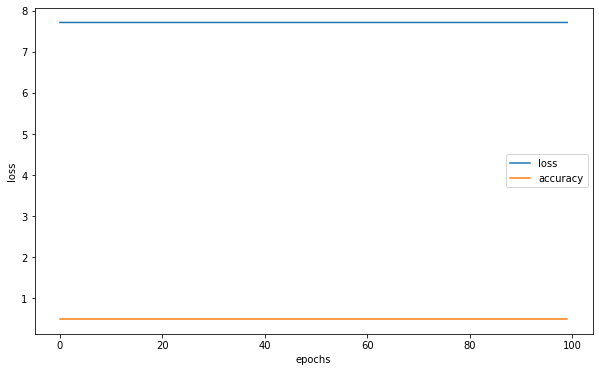

In [179]:
plot_history(history_6)

doing binary classifcation...


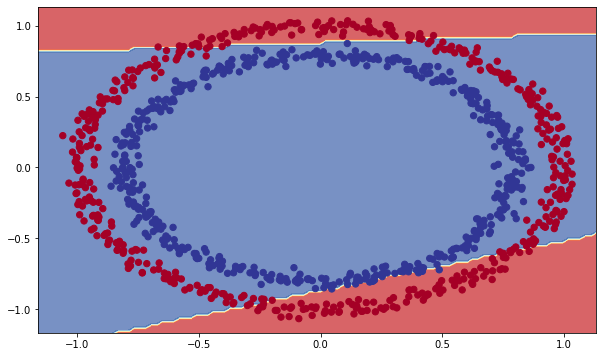

In [180]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_6,X,y)

In [181]:
# Time to try to build a model with a sigmoid output layer

# Set up random seed
tf.random.set_seed(42)

# 1. Build the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_7 = model_7.fit(X,y,epochs=100,verbose=0)

# 4. Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

doing binary classifcation...


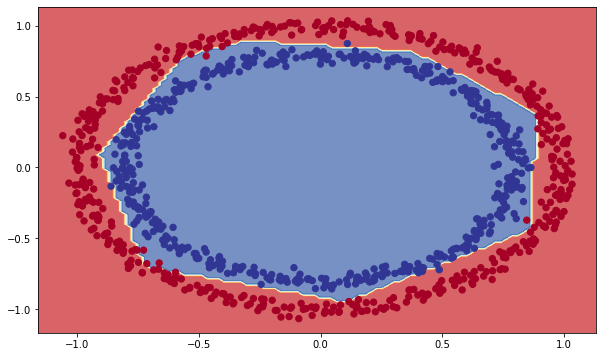

In [182]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_7,X,y)

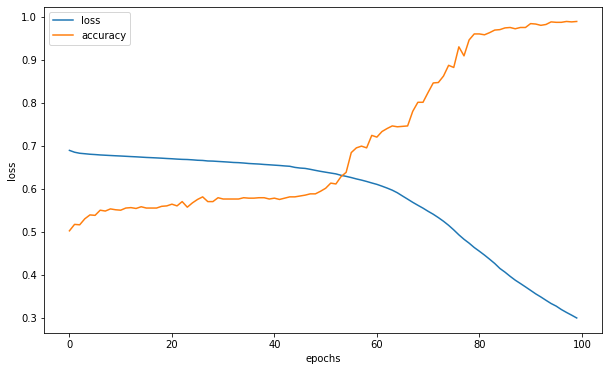

In [183]:
plot_history(history_7)

In [184]:
# Make a sigmoid function
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Make a relu function
def relu(x):
  return tf.maximum(0,x)

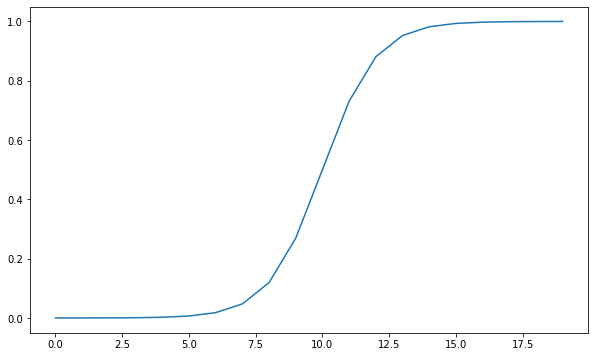

In [185]:
# Create a simple tensor
A = tf.cast(tf.range(-10,10),tf.float32)

# Now lets plot our sigmoid on our tensor
plt.figure(figsize=(10,6))
plt.plot(sigmoid(A));

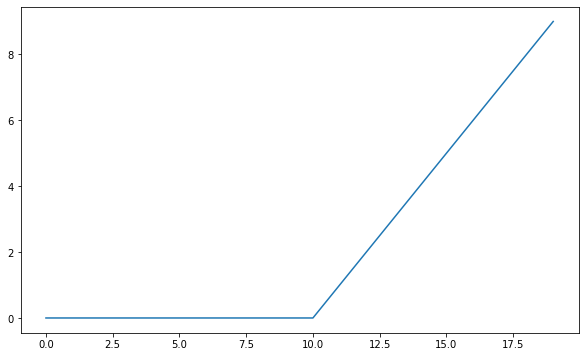

In [186]:
# Plot the relu of our tensor
plt.figure(figsize=(10,6))
plt.plot(relu(A));

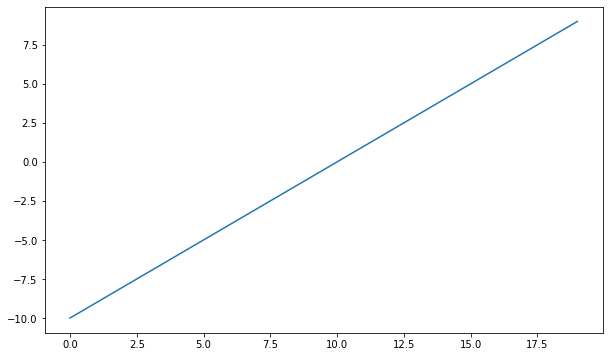

In [187]:
# Plot the linear activation
plt.figure(figsize=(10,6))
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classification

In [188]:
# Lets split into train and test sets

X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

### Now lets properly create a model which will be fit on the training data and evaluate on the testing data

In [189]:
# Set up random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Setup callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)

# 3. Fit the model
history_8 = model_8.fit(X_train,y_train,epochs=200,callbacks=[callback],verbose=0)

# 4. Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9950


[0.09170624613761902, 0.9950000047683716]

doing binary classifcation...
doing binary classifcation...


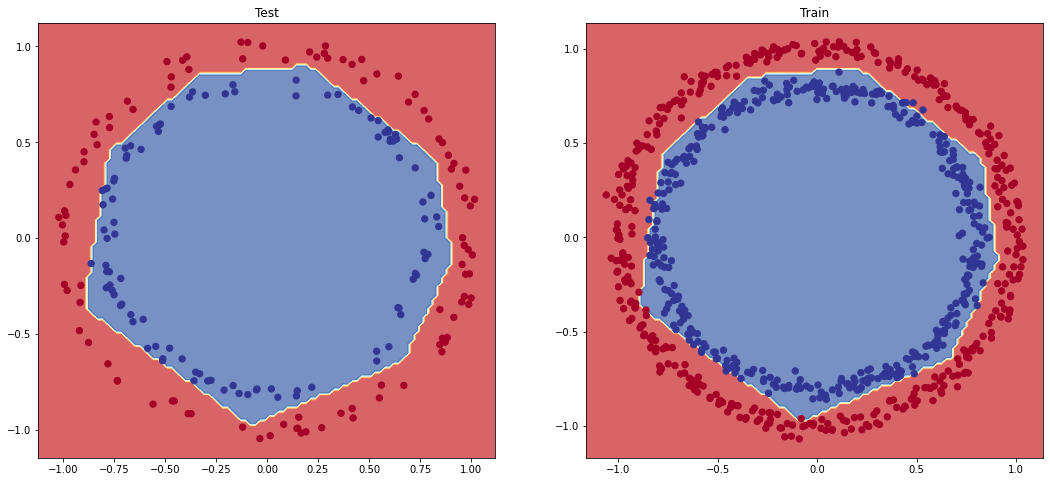

In [190]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train);

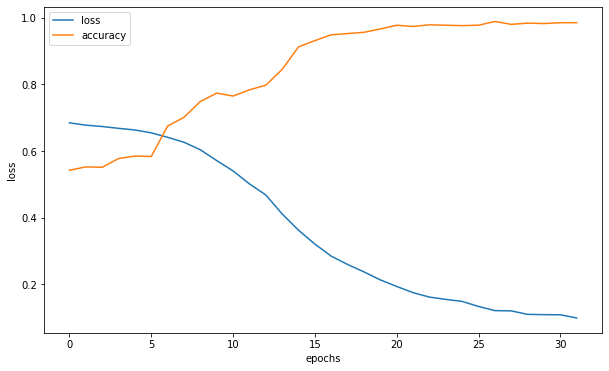

In [191]:
plot_history(history_8)

In [192]:
model_8.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_83 (Dense)             (None, 4)                 20        
_________________________________________________________________
flatten_17 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Finding the best learning rate

to find the ideal learning rate we are going to use this steps:
* **A learning rate callback**
* **Another model**
* **A modified loss curve plot**

In [193]:
# Build new model

# Set up random seed
tf.random.set_seed(42)


# 1. Build the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


# 2. Compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Setup up callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks = [callback,lr_scheduler],
                        verbose=0)

# 4. Evaluate the model
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9850


[0.061318088322877884, 0.9850000143051147]

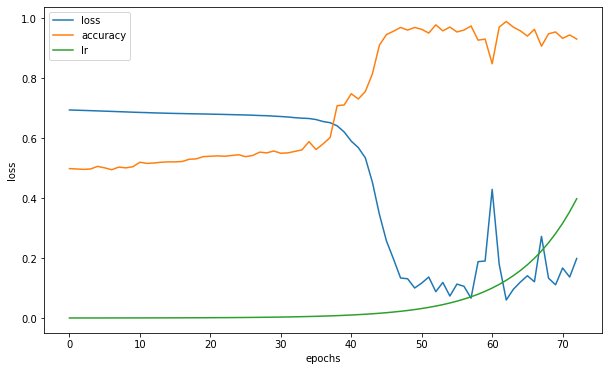

In [194]:
plot_history(history_9)

In [195]:
tot_epochs = len(history_9.history["loss"])
tot_epochs

73

doing binary classifcation...
doing binary classifcation...


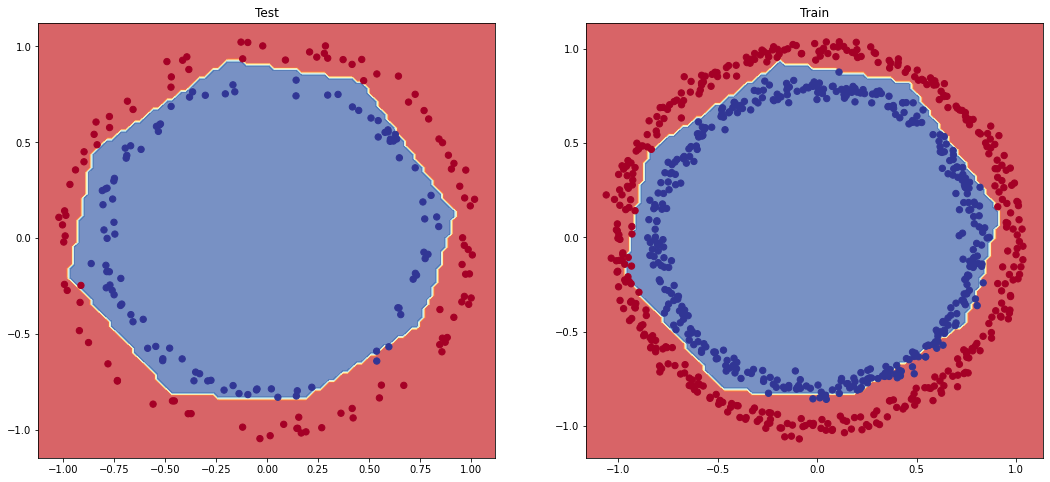

In [196]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundary(model_9,X_train,y_train);

In [197]:
# Lets plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(tot_epochs)/20))
lrs

<tf.Tensor: shape=(73,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.46683

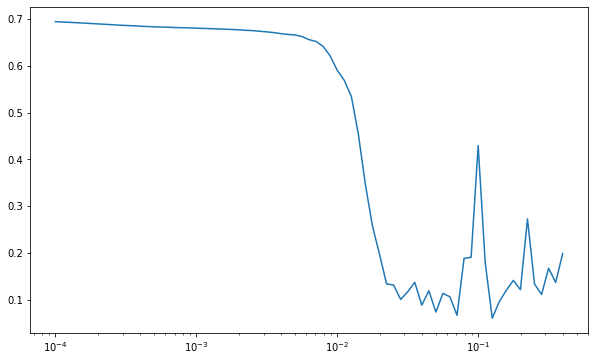

In [198]:
plt.semilogx(lrs,history_9.history["loss"])

In order to get the best learning rate we should look for place that it still continues to decline while not spiking. So we can see from the plot that the ideal range is between 10 ** -2 and a few steps ahead

In [199]:
# So now lets build a model with the perfect learning rate which is 0.02

# Setup random seed
tf.random.set_seed(42)

# Build the model 

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model with ideal lr

model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])


# Set up callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)


# Fit the model
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=100,
                          callbacks = [callback],
                          verbose=0)

# Evaluate the model
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 1.0000


[0.03967798128724098, 1.0]

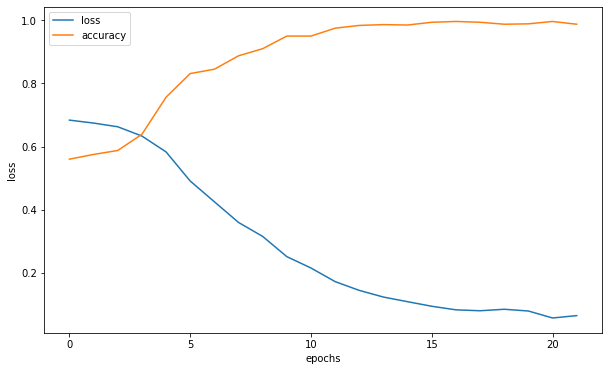

In [200]:
plot_history(history_10)

doing binary classifcation...
doing binary classifcation...


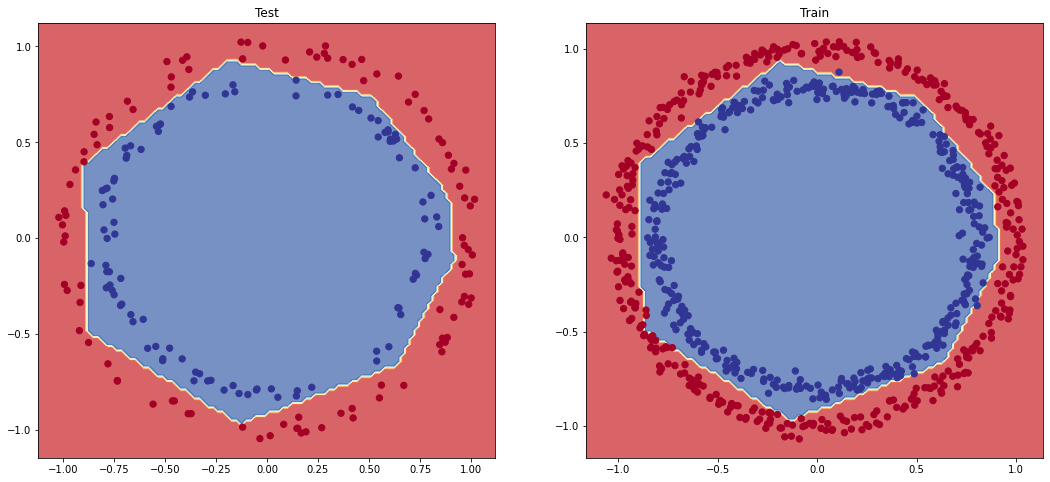

In [201]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)
plt.subplot(1,2,2)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train);

## More classification evaluation methods

Besides visualizing our models results , we can also use other classification evaluation methods such as:
* **Accuracy**
* **Precision** - Leads to less false positives
* **Recall** - leads to less false negatives
* **F1-Score** - combination between precision and recall
* **Confusion matrix**
* **Classification report** - from scikit-learn

In [202]:
# Check the accuracy of our model
loss , accuracy = model_10.evaluate(X_test,y_test)

print(f"Model loss on the test sets : {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 1.0000
Model loss on the test sets : 0.03967798128724098
Model accuracy on the test set: 100.00%


In [203]:
# Now lets see a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)


# We need to conver our y_preds into binary format 
y_preds = tf.round(y_preds)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test,y_preds)
cf_matrix

array([[101,   0],
       [  0,  99]])

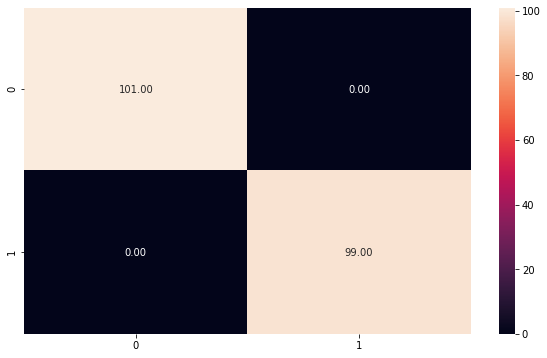

In [204]:
# Plot the confusion matrix
import seaborn as sns
sns.heatmap(cf_matrix,annot=True,fmt='.2f');

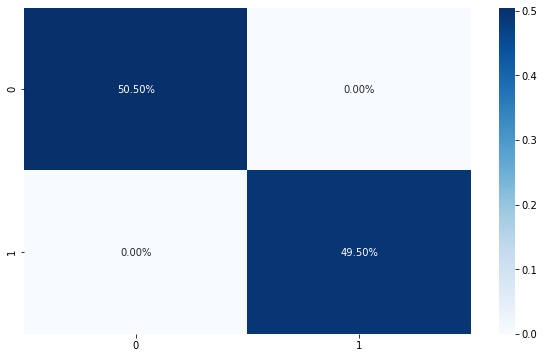

In [205]:
cf_percent = cf_matrix / np.sum(cf_matrix)

sns.heatmap(cf_percent,annot=True,fmt='.2%',cmap='Blues');

In [206]:
# Lets make a confusion matrix from scrathc
import itertools

# Create a function for the confugion matrix
def plot_conf_matrix(y_test,y_preds,classes=False,figsize=(15,15),textsize=15):
  """
  Takes as input the y_test and the y_preds
  and then plots a confusion matrix
  """
  # Create the confusion matrix
  cm = confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=(figsize))
  # Create a matrix plot 
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion matrix",
         xlabel="Predicted Label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=textsize)
  plt.show()

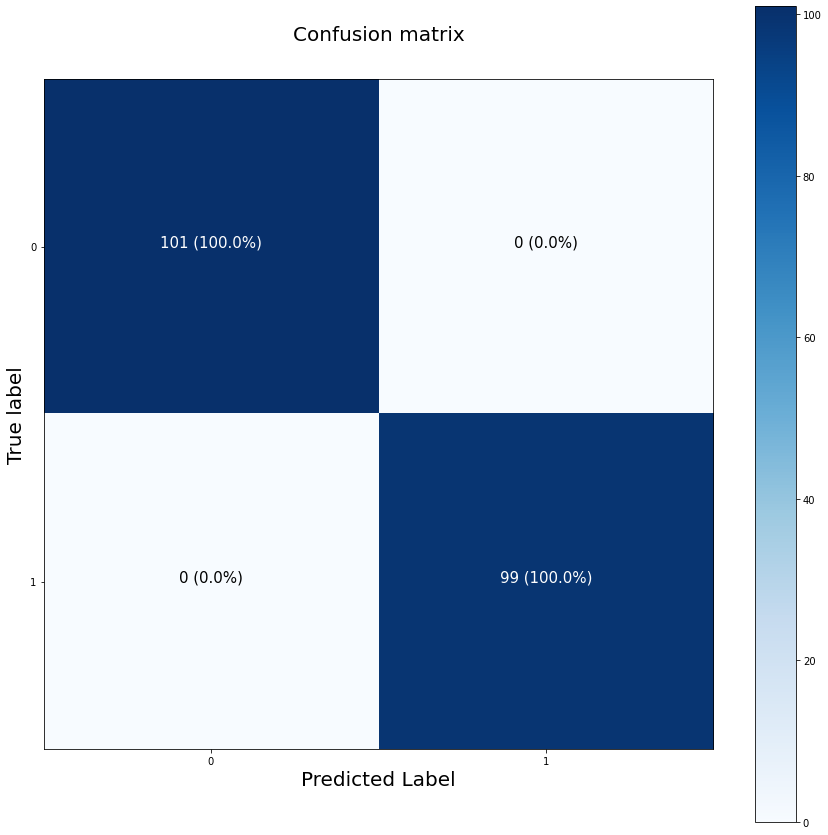

In [207]:
plot_conf_matrix(y_test,y_preds)

## Working with larger examples (multiclass classification)

When we have more than two classes to identify it is considered as **multi-class classification**

---
We are going to build a neural network to classifiy images of different items of clothing.
* We will use fashion mnist dataset


In [208]:
from tensorflow.keras.datasets import fashion_mnist


# The data has already been sorted into training and test sets
(train_data,train_labels) , (test_data,test_labels) = fashion_mnist.load_data()

In [209]:
print(f"First training sample:\n {train_data[0]}\n")
print(f"Training label:\n {train_labels[0]}\n")

First training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   

In [210]:
# Check the shape of the first example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

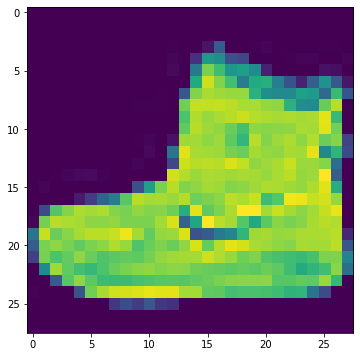

In [211]:
# Plot a single sample
plt.imshow(train_data[0]);

In [212]:
# Check out samples label
train_labels[0]

9

In [213]:
# Create a small list so we can index on our training index so we can understand them
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneakers","Bag","Ankle boot"]


len(class_names)

10

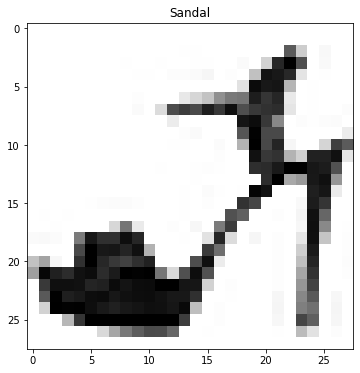

In [214]:
# Plot an example image and its label
index = 9
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]]);

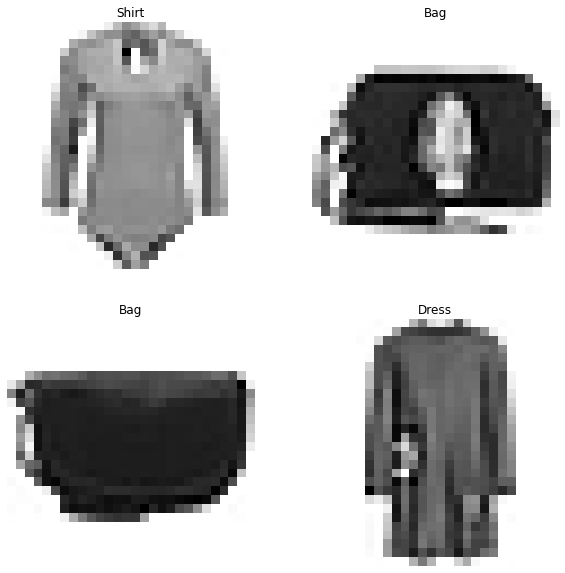

In [215]:
# Plot multiple random images 
import random
plt.figure(figsize=(10,10))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multi-class classification model


---
For our multi-class classification we are going to have to tweak:
* Input shape = 28x28 (the shape of 1 image)
* Output shape = 10 (1 per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = softmax not sigmoid


In [216]:
# Time to build the model

# Set up random seed
tf.random.set_seed(42)
input_shape=(28,28)
# Build the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Set up callback
callback = tf.keras.callbacks.EarlyStopping(monitor="acuracy",patience=5)

# Fit the model
history_11 = model_11.fit(train_data,
                          train_labels,
                          epochs=10,
                          callbacks = [callback],
                          validation_data = (test_data,test_labels),
                          verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

In [217]:
model_11.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_92 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_93 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


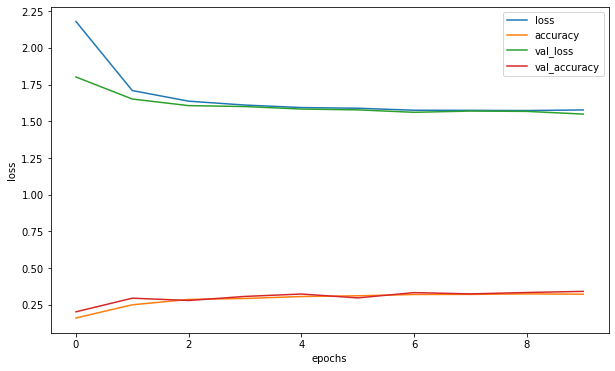

In [218]:
plot_history(history_11)

Neural Networks prefer data to be scaled or normalized, this mean they have to have numbers in between 0 and 1

In [219]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum


train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [220]:
# Time to remake our model but this time with the normalized values 


# Set up random seed
tf.random.set_seed(42)


# Build model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm,test_labels),
                          verbose=0)

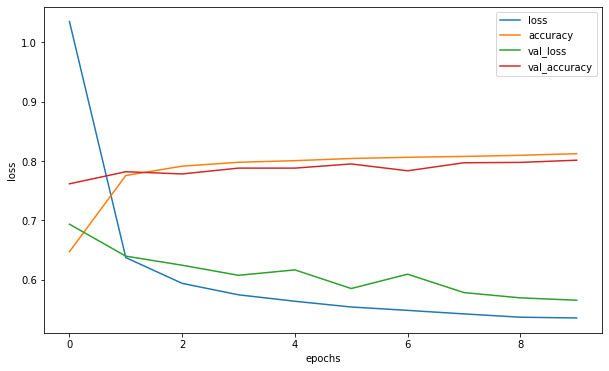

In [221]:
plot_history(history_12)

Lets compare our non-normalized data loss curves to the normalized data 

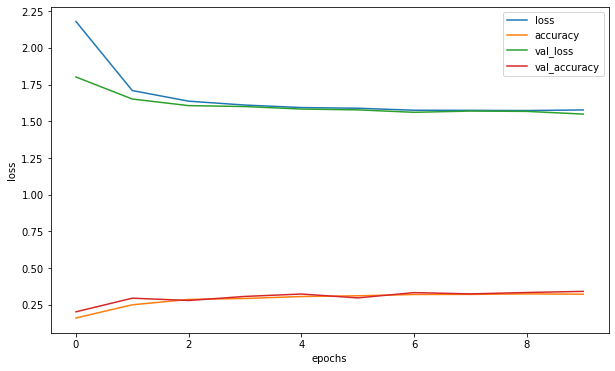

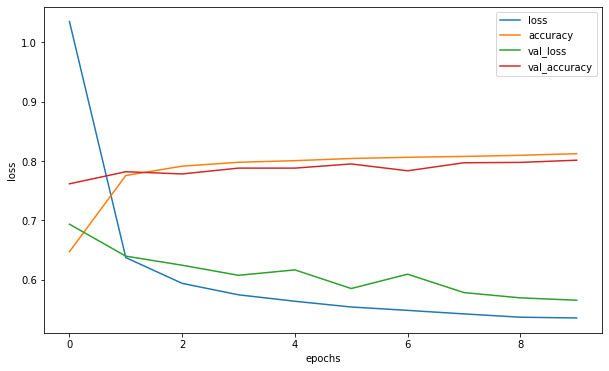

In [222]:
plot_history(history_11)
plot_history(history_12)

## Lets find out the ideal learning rate

In [223]:
# Build a testing model

# Set seed
tf.random.set_seed(42)

# Build model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# COmpile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Set up learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))


# Fit the model
history_13 = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm,test_labels),
                          callbacks = [lr_scheduler],
                          verbose=0)

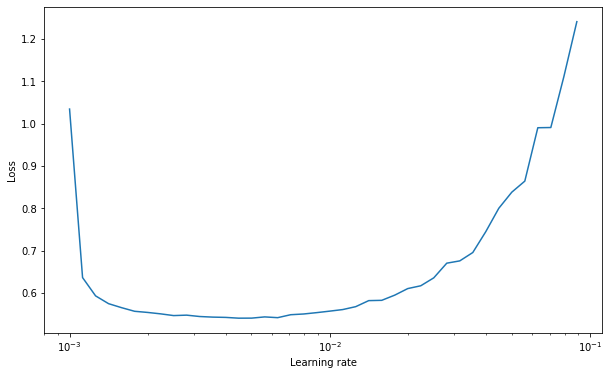

In [224]:
# Time to plot the learning rate in order to find the best
lrs = 1e-3 * (10 ** (tf.range(40)/20))

plt.semilogx(lrs,history_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss");

In [225]:
# We can see that the perfect learning rate is 10 ** -3 
# So lets build another model with the perfect learning rate

# Set up random seed
tf.random.set_seed(42)


# Build the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm,test_labels),
                          verbose=0)


## Evaluating our multi-class classification model

---

To evaluate our multi-class classification model we could:
* evaluate its performance using other classification metrics 
* Assses some of its predictions through visualizasions
* Improve its results by training it for longer or changing the architecture
* Save and export it for use in an application

In [226]:
# Create a confusion matrix
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # Prediction probabilities
y_probs[:3]

array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14]], dtype=float32)

In [227]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [228]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneakers',
 'Bag',
 'Ankle boot']

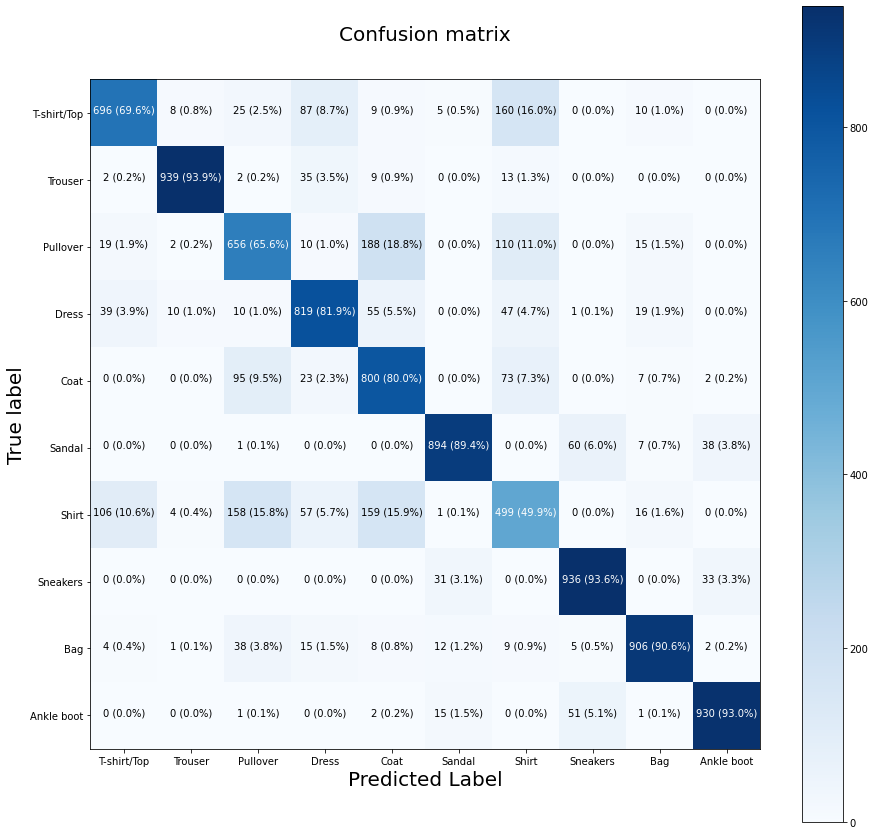

In [229]:
plot_conf_matrix(y_test=test_labels,
                 y_preds = y_preds,
                 classes = class_names,
                 figsize = (15,15),
                 textsize = 10)

### Lets make a function to:
* Plot random image
* Make prediction on said image
* Label the plot with the truth label and predicted label

In [230]:

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image plots it and labels it with a prediction and the truth label
  """
  # Set up random integer 
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true_label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) 

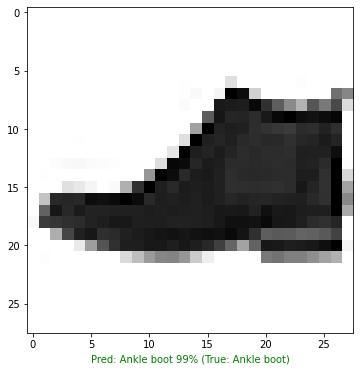

In [231]:
# Lets chech out a random image and the prediciton

plot_random_image(model = model_14,
                  images = test_data_norm, # Always make predictions on the same kind of data your model was trained for
                  true_labels = test_labels,
                  classes = class_names)

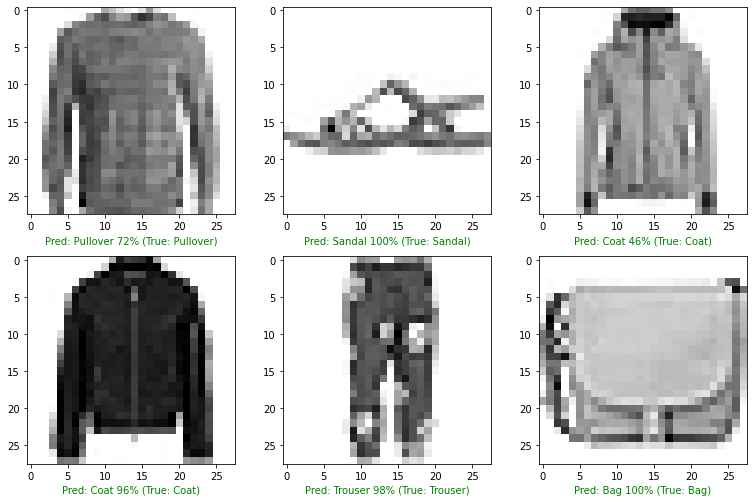

In [232]:
plt.figure(figsize=(13,13))
for i in range(6):
  ax = plt.subplot(3,3,i+1)
  plot_random_image(model = model_14,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

## What patterns our model is learning

In [233]:
# Find the layers of our most recent model
model_14.layers

In [234]:
# Extract a particular layer
model_14.layers[1]

In [235]:
# Get the patterns of a layer in our network
weights , biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

In [236]:
biases,biases.shape

(array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32), (4,))

In [237]:
model_14.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_101 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_102 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Every neuron has a bias vector.Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros

The bias vector dictates how much the patterns within the corresponding weight matrix should influence the next layer

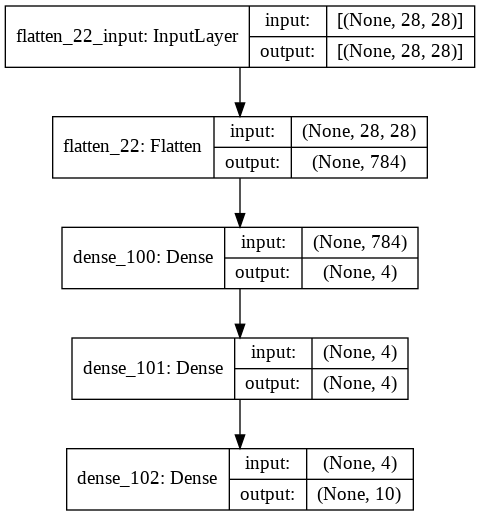

In [238]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)

## Lets try to make a model with over 88% accuracy

In [239]:
# Build another model ,add hidden layers, train it for longer ,setup callback
# Set up random seed
tf.random.set_seed(42)

# Build the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Set up callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)

# Fit the model
history_15 = model_15.fit(train_data_norm,
                          train_labels,
                          epochs= 200,
                          validation_data=(test_data_norm,test_labels),
                          callbacks=[callback],
                          verbose=0)

In [240]:
loss_11 , accuracy_11 = model_11.evaluate(test_data,test_labels)
loss_13 , accuracy_13 = model_13.evaluate(test_data_norm,test_labels)
loss_14 , accuracy_14 = model_14.evaluate(test_data_norm,test_labels)
loss_15 , accuracy_15 = model_15.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7778 - accuracy: 0.8831


In [241]:
model_results = [["model 11",loss_11,accuracy_11],
                 ["model 13",loss_13,accuracy_13],
                 ["model 14",loss_14,accuracy_14],
                 ["model 15",loss_15,accuracy_15]]
model_results

[['model 11', 1.548835277557373, 0.3409999907016754],
 ['model 13', 1.0874977111816406, 0.5861999988555908],
 ['model 14', 0.5659514665603638, 0.8075000047683716],
 ['model 15', 0.7777816653251648, 0.8830999732017517]]

In [242]:
model_results_df = pd.DataFrame(model_results,columns=["model","loss","accuracy"])
model_results_df

,model,loss,accuracy
0,model 11,1.548835,0.3410
1,model 13,1.087498,0.5862
2,model 14,0.565951,0.8075
3,model 15,0.777782,0.8831


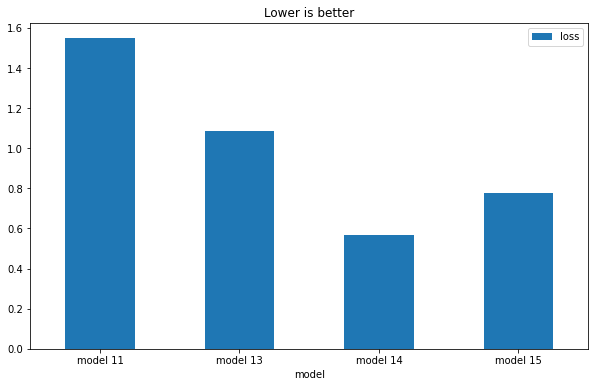

In [243]:
model_results_df.plot(x="model",y="loss",kind="bar")
plt.xticks(rotation= "horizontal")
plt.title("Lower is better");

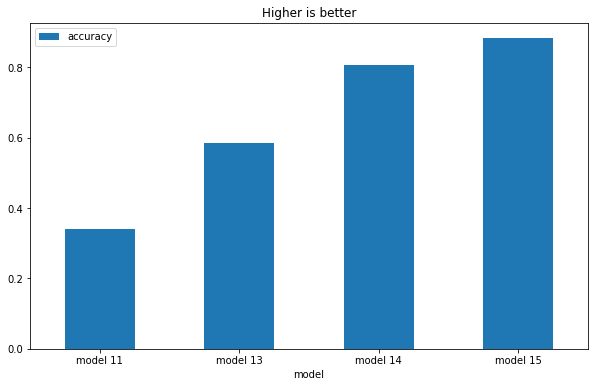

In [244]:
model_results_df.plot(x="model",y="accuracy",kind="bar")
plt.xticks(rotation="horizontal")
plt.title("Higher is better");

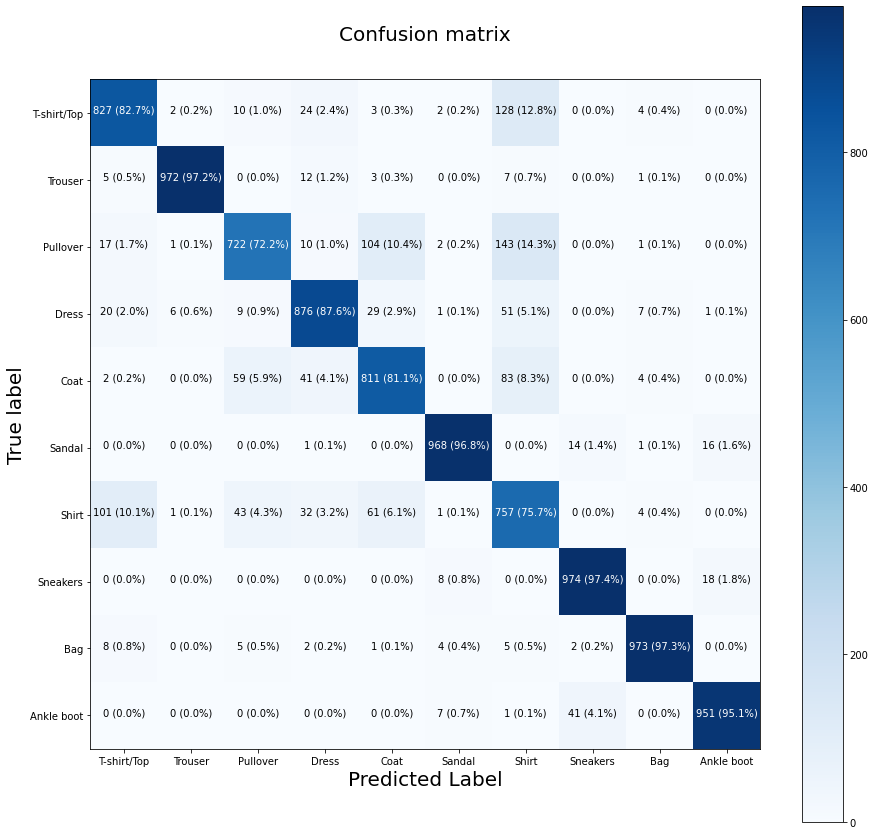

In [245]:
# Create a confusion matrix
# Make some predictions with our model
y_probs = model_15.predict(test_data_norm) # Prediction probabilities
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# Finnaly plot a conf matrix
plot_conf_matrix(y_test=test_labels,
                 y_preds = y_preds,
                 classes = class_names,
                 figsize = (15,15),
                 textsize = 10)

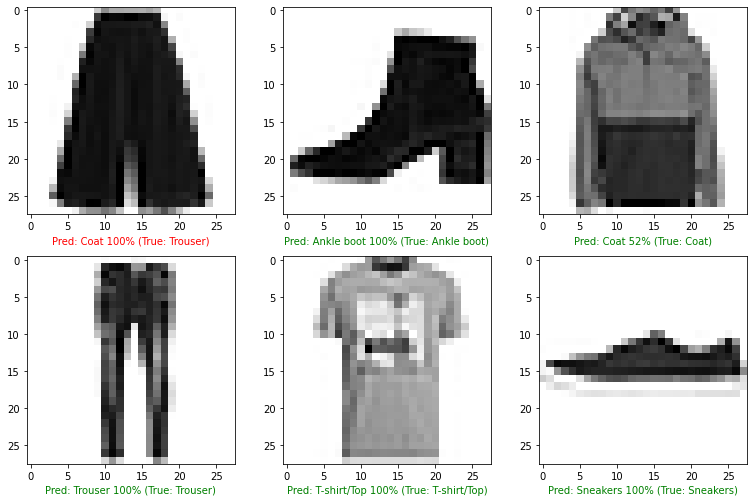

In [246]:
plt.figure(figsize=(13,13))
for i in range(6):
  ax = plt.subplot(3,3,i+1)
  plot_random_image(model = model_15,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

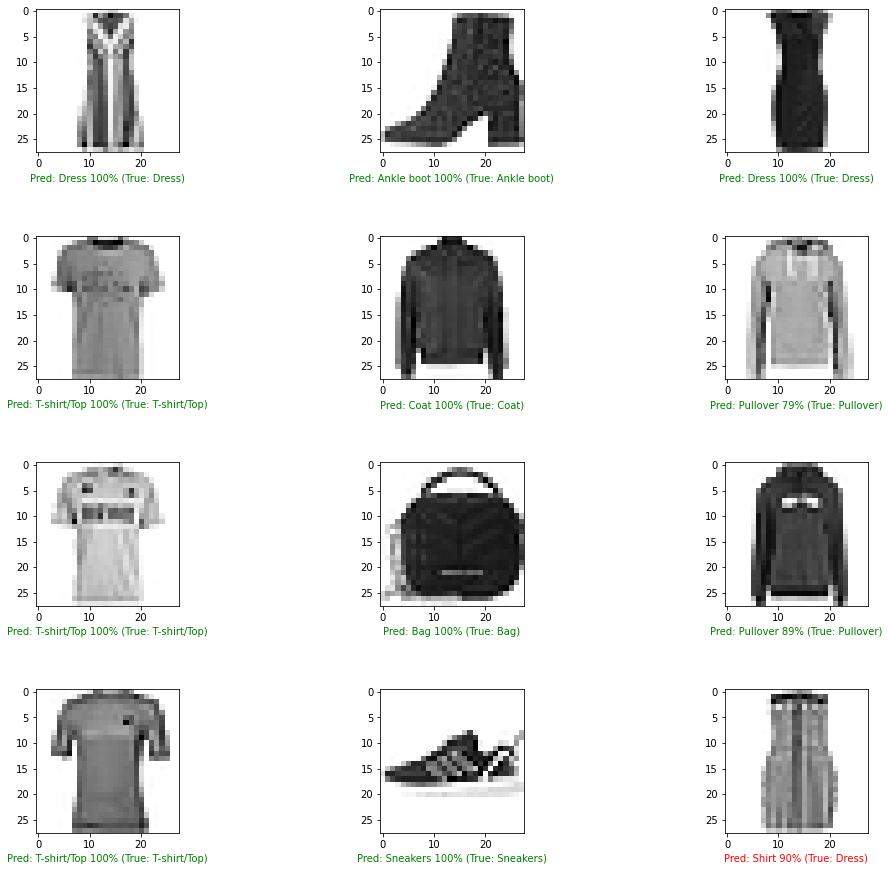

In [247]:
# Plot some images
num_rows = 4
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*3*num_cols,4*num_rows))

for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_random_image(model = model_15,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)